In [1]:
from pathlib import Path
from ipyleaflet import Map, LayersControl, LayerGroup, Polygon, GeoJSON, LegendControl, FullScreenControl, basemaps, basemap_to_tiles
from ipywidgets.embed import embed_minimal_html
import json
import random
from tqdm.auto import tqdm
import pandas as pd
from itertools import chain
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
#from shapely.geometry import Point, LineString
from geojson import Feature, LineString
import numpy as np
import geopandas as gpd
from geojson_length import calculate_distance, Unit
from shapely.geometry import Point as geoPoint, Polygon as geoPolygon
from shapely import wkt
import geojson
from pyproj import Geod
from area import area
import random
import networkx as nx
import matplotlib.pyplot as plt
import math

('a', 'c', {'weight': 3, 'key': 1})
('c', 'b', {'weight': 8, 'key': 2})
('c', 'd', {'weight': 12, 'key': 3})
('d', 'e', {'weight': 8, 'key': 4})
('e', 'i', {'weight': 12, 'key': 3})
('e', 'm', {'weight': 8, 'key': 4})
('e', 'n', {'weight': 2, 'key': 2})
('f', 'h', {'weight': 2, 'key': 2})
('h', 'g', {'weight': 2, 'key': 1})
('h', 'i', {'weight': 12, 'key': 4})
('j', 'l', {'weight': 2, 'key': 1})
('l', 'k', {'weight': 8, 'key': 4})
('l', 'm', {'weight': 3, 'key': 3})
('n', 'o', {'weight': 3, 'key': 3})
('o', 'p', {'weight': 2, 'key': 1})
('o', 'k1', {'weight': 3, 'key': 3})
('o', 'g1', {'weight': 1, 'key': 1})
('p', 'q', {'weight': 4, 'key': 4})
('p', 's', {'weight': 4, 'key': 1})
('q', 'r', {'weight': 6, 'key': 2})
('q', 'k1', {'weight': 1, 'key': 1})
('q', 't', {'weight': 8, 'key': 4})
('r', 'k1', {'weight': 6, 'key': 3})
('r', 'u', {'weight': 8, 'key': 4})
('k1', 'f1', {'weight': 12, 'key': 4})
('k1', 'j1', {'weight': 1, 'key': 1})
('t', 'w', {'weight': 3, 'key': 1})
('t', 's', {'wei

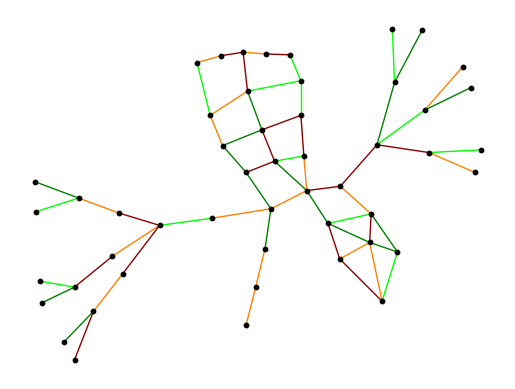

In [9]:
safety_values =  {
('a','c'): 1,
('b','c'): 2,
('c','d'): 3,
('d','e'): 4,
('f','h'): 2,
('g','h'): 1,
('h','i'): 4,
('i','e'): 3,
('j','l'): 1,
('k','l'): 4,
('l','m'): 3,
('m','e'): 4,
('e','n'): 2,
('n','o'): 3,
('o','p'): 1,
('p','q'): 4,
('q','r'): 3,
('q','k1'): 2,
('q','t'): 2,
('p','s'): 1,
('s','v'): 3,
('v','e1'): 2,
('e1','d1'): 3,
('d1','c1'): 4,
('c1','b1'): 3,
('b1','a1'): 4,
('o','k1'): 3,
('k1','q'): 1,
('k1','r'): 3,
('q','r'): 2,
('q','t'): 4,
('t','w'): 1,
('w','c1'): 4,
('v','w'): 3,
('t','s'): 1,
('r','u'): 4,
('u','z'): 2,
('z','a1'): 2,
('w','z'): 2,
('u','t'): 4,
('o','g1'): 1,
('g1','h1'): 3,
('h1','i1'): 3,
('k1','f1'): 4,
('f1','l1'): 3,
('l1','n1'): 1,
('n1','o1'): 2,
('k1','j1'): 1,
('j1','m1'): 4,
('m1','o1'): 4,
('j1','l1'): 2,
('j1','b2'): 1,
('l1','b2'): 4,
('m1','b2'): 3,
('b2','o1'): 3,
('b2','n1'): 1,
('f1','p1'): 4,
('p1','q1'): 1,
('q1','r1'): 2,
('q1','s1'): 1,
('p1','t1'): 2,
('t1','u1'): 3,
('t1','v1'): 1,
('p1','w1'): 4,
('w1','z1'): 2,
('w1','a2'): 3,
}
# Create an empty graph
G = nx.Graph()

# Iterate through each key-value pair in the dictionary
for key, value in safety_values.items():
    # Generate a random weight between 1 and 4 multiplied by the value of the key
    random_weight = random.randint(1, 4) * value
    # Add the edge to the graph with the random weight as the attribute
    G.add_edge(key[0], key[1], weight=random_weight, key=value)

# Print the edges and their weights
for edge in G.edges(data=True):
    print(edge)
# Define colors for each key
colors = {4: '#8B0000', 3: '#FF8000', 2: '#00FF00', 1: '#008000'}

# Get the positions of the nodes (using the node coordinates as positions)
pos = {
'a' : np.array([-5.0215337305401,1.223265423794]),
'b' : np.array([-5.001068614261,0.7730328656544]),
'c' : np.array([-4.2438593119354,0.9776840284451]),
'd' : np.array([-3.527580242168,0.7525677493754]),
'e' : np.array([-2.8113011724005,0.5683817028637]),
'f' : np.array([-4.9340970450932,-0.2655990708621]),
'g' : np.array([-4.8978310930543,-0.5919926392119]),
'h' : np.array([-4.3175758604326,-0.3562639509593]),
'i' : np.array([-3.6466557477137,0.1061269375362]),
'j' : np.array([-4.5079721086366,-1.1813143598433]),
'k' : np.array([-4.3175758604326,-1.444242512125]),
'l' : np.array([-3.9821158040731,-0.7189234713479]),
'm' : np.array([-3.4653259875194,-0.1568012147456]),
'n' : np.array([-1.8893288932625,0.6754002207058]),
'o' : np.array([-0.8403397686802,0.8178555339206]),
'p' : np.array([-1.2806561913444,1.3617758207411]),
'q' : np.array([-0.7755873535826,1.530132099995]),
'r' : np.array([-0.2575680328012,1.6078349981123]),
's' : np.array([-1.6950716479695,1.7632407943467]),
't' : np.array([-1,2]),
'u' : np.array([-0.3093699648793,2.2165077000304]),
'v' : np.array([-1.9152298593016,2.2165077000304]),
'w' : np.array([-1.2547552253053,2.5791212245774]),
'z' : np.array([-0.3093699648793,2.7345270208118]),
'a1' : np.array([-0.5036272101723,3.1230415113978]),
'b1' : np.array([-0.930993149817,3.1359919944174]),
'c1' : np.array([-1.3324581234225,3.1618929604564]),
'd1' : np.array([-1.7209726140086,3.1100910283783]),
'e1' : np.array([-2.1483385536532,3.006487164222]),
'f1' : np.array([0.3899561181756,1.1545680924285]),
'g1' : np.array([-0.9439436328365,0.222133315022]),
'h1' : np.array([-1.1122999120905,-0.360638420857]),
'i1' : np.array([-1.2806561913444,-0.9304596737166]),
'j1' : np.array([0.1697979068435,0.5976973225885]),
'k1' : np.array([-0.205766100723,1.0898156773309]),
'l1' : np.array([0.933876404996,0.7401526358034]),
'm1' : np.array([0.377005635156,0.0667275187876]),
'n1' : np.array([1.4000937936993,0.1703313829439]),
'o1' : np.array([1.1281336502891,-0.5678461491696]),
'p1' : np.array([1.0374802691523,1.7761912773662]),
'q1' : np.array([1.3482918616211,2.7086260547727]),
'r1' : np.array([1.3094404125625,3.5115560019839]),
's1' : np.array([1.8404102163635,3.4986055189643]),
't1' : np.array([1.8792616654221,2.2942105981476]),
'u1' : np.array([2.5526867824379,2.9417347491243]),
'v1' : np.array([2.6951420956528,2.6309231566555]),
'w1' : np.array([1.9569645635393,1.6596369301904]),
'z1' : np.array([2.8764488579263,1.698488379249]),
'a2' : np.array([2.77284499377,1.3617758207411]),
'b2' : np.array([0.907975438957,0.3127866961588])
}

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='black')

# Iterate through the edges and draw them with the appropriate color
for edge in G.edges(data=True):
    endpoint1, endpoint2, data = edge
    key = data['key']
    color = colors[key]
    nx.draw_networkx_edges(G, pos, edgelist=[(endpoint1, endpoint2)], edge_color=color, width=1)

# Show the plot
plt.axis('off')
plt.show()

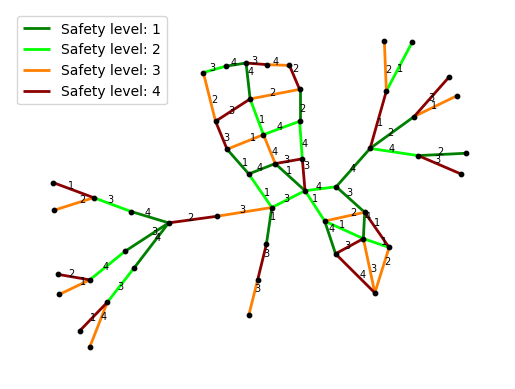

In [32]:
G = nx.Graph()
G.add_edge('a', 'c', weight=1, key=4)
G.add_edge('b', 'c', weight=2, key=3)
G.add_edge('c', 'd', weight=3, key=2)
G.add_edge('d', 'e', weight=4, key=1)
G.add_edge('f', 'h', weight=2, key=4)
G.add_edge('g', 'h', weight=1, key=3)
G.add_edge('h', 'i', weight=4, key=2)
G.add_edge('i', 'e', weight=3, key=1)
G.add_edge('j', 'l', weight=1, key=4)
G.add_edge('k', 'l', weight=4, key=3)
G.add_edge('l', 'm', weight=3, key=2)
G.add_edge('m', 'e', weight=4, key=1)
G.add_edge('e', 'n', weight=2, key=4)
G.add_edge('n', 'o', weight=3, key=3)
G.add_edge('o', 'p', weight=1, key=2)
G.add_edge('p', 'q', weight=4, key=1)
G.add_edge('q', 'r', weight=3, key=4)
G.add_edge('q', 'k1', weight=2, key=3)
G.add_edge('q', 't', weight=2, key=2)
G.add_edge('p', 's', weight=1, key=1)
G.add_edge('s', 'v', weight=3, key=4)
G.add_edge('v', 'e1', weight=2, key=3)
G.add_edge('e1', 'd1', weight=3, key=2)
G.add_edge('d1', 'c1', weight=4, key=1)
G.add_edge('c1', 'b1', weight=3, key=4)
G.add_edge('b1', 'a1', weight=4, key=3)
G.add_edge('o', 'k1', weight=3, key=2)
G.add_edge('k1', 'q', weight=1, key=1)
G.add_edge('k1', 'r', weight=3, key=4)
G.add_edge('q', 't', weight=4, key=3)
G.add_edge('t', 'w', weight=1, key=2)
G.add_edge('w', 'c1', weight=4, key=1)
G.add_edge('v', 'w', weight=3, key=4)
G.add_edge('t', 's', weight=1, key=3)
G.add_edge('r', 'u', weight=4, key=2)
G.add_edge('u', 'z', weight=2, key=1)
G.add_edge('z', 'a1', weight=2, key=4)
G.add_edge('w', 'z', weight=2, key=3)
G.add_edge('u', 't', weight=4, key=2)
G.add_edge('o', 'g1', weight=1, key=1)
G.add_edge('g1', 'h1', weight=3, key=4)
G.add_edge('h1', 'i1', weight=3, key=3)
G.add_edge('k1', 'f1', weight=4, key=2)
G.add_edge('f1', 'l1', weight=3, key=1)
G.add_edge('l1', 'n1', weight=1, key=4)
G.add_edge('n1', 'o1', weight=2, key=3)
G.add_edge('k1', 'j1', weight=1, key=2)
G.add_edge('j1', 'm1', weight=4, key=1)
G.add_edge('m1', 'o1', weight=4, key=4)
G.add_edge('j1', 'l1', weight=2, key=3)
G.add_edge('j1', 'b2', weight=1, key=2)
G.add_edge('l1', 'b2', weight=4, key=1)
G.add_edge('m1', 'b2', weight=3, key=4)
G.add_edge('b2', 'o1', weight=3, key=3)
G.add_edge('b2', 'n1', weight=1, key=2)
G.add_edge('f1', 'p1', weight=4, key=1)
G.add_edge('p1', 'q1', weight=1, key=4)
G.add_edge('q1', 'r1', weight=2, key=3)
G.add_edge('q1', 's1', weight=1, key=2)
G.add_edge('p1', 't1', weight=2, key=1)
G.add_edge('t1', 'u1', weight=3, key=4)
G.add_edge('t1', 'v1', weight=1, key=3)
G.add_edge('p1', 'w1', weight=4, key=2)
G.add_edge('w1', 'z1', weight=2, key=1)
G.add_edge('w1', 'a2', weight=3, key=4)

# Iterate through each edge in the graph
# Multiply the weight by the key value
# for u, v, data in G.edges(data=True):
#     data['weight'] *= data['key']

colors = {4: '#8B0000', 3: '#FF8000', 2: '#00FF00', 1: '#008000'}

# Get the positions of the nodes (using the node coordinates as positions)
pos = {
'a' : np.array([-5.0215337305401,1.223265423794]),
'b' : np.array([-5.001068614261,0.7730328656544]),
'c' : np.array([-4.2438593119354,0.9776840284451]),
'd' : np.array([-3.527580242168,0.7525677493754]),
'e' : np.array([-2.8113011724005,0.5683817028637]),
'f' : np.array([-4.9340970450932,-0.2655990708621]),
'g' : np.array([-4.8978310930543,-0.5919926392119]),
'h' : np.array([-4.3175758604326,-0.3562639509593]),
'i' : np.array([-3.6466557477137,0.1061269375362]),
'j' : np.array([-4.5079721086366,-1.1813143598433]),
'k' : np.array([-4.3175758604326,-1.444242512125]),
'l' : np.array([-3.9821158040731,-0.7189234713479]),
'm' : np.array([-3.4653259875194,-0.1568012147456]),
'n' : np.array([-1.8893288932625,0.6754002207058]),
'o' : np.array([-0.8403397686802,0.8178555339206]),
'p' : np.array([-1.2806561913444,1.3617758207411]),
'q' : np.array([-0.7755873535826,1.530132099995]),
'r' : np.array([-0.2575680328012,1.6078349981123]),
's' : np.array([-1.6950716479695,1.7632407943467]),
't' : np.array([-1,2]),
'u' : np.array([-0.3093699648793,2.2165077000304]),
'v' : np.array([-1.9152298593016,2.2165077000304]),
'w' : np.array([-1.2547552253053,2.5791212245774]),
'z' : np.array([-0.3093699648793,2.7345270208118]),
'a1' : np.array([-0.5036272101723,3.1230415113978]),
'b1' : np.array([-0.930993149817,3.1359919944174]),
'c1' : np.array([-1.3324581234225,3.1618929604564]),
'd1' : np.array([-1.7209726140086,3.1100910283783]),
'e1' : np.array([-2.1483385536532,3.006487164222]),
'f1' : np.array([0.3899561181756,1.1545680924285]),
'g1' : np.array([-0.9439436328365,0.222133315022]),
'h1' : np.array([-1.1122999120905,-0.360638420857]),
'i1' : np.array([-1.2806561913444,-0.9304596737166]),
'j1' : np.array([0.1697979068435,0.5976973225885]),
'k1' : np.array([-0.205766100723,1.0898156773309]),
'l1' : np.array([0.933876404996,0.7401526358034]),
'm1' : np.array([0.377005635156,0.0667275187876]),
'n1' : np.array([1.4000937936993,0.1703313829439]),
'o1' : np.array([1.1281336502891,-0.5678461491696]),
'p1' : np.array([1.0374802691523,1.7761912773662]),
'q1' : np.array([1.3482918616211,2.7086260547727]),
'r1' : np.array([1.3094404125625,3.5115560019839]),
's1' : np.array([1.8404102163635,3.4986055189643]),
't1' : np.array([1.8792616654221,2.2942105981476]),
'u1' : np.array([2.5526867824379,2.9417347491243]),
'v1' : np.array([2.6951420956528,2.6309231566555]),
'w1' : np.array([1.9569645635393,1.6596369301904]),
'z1' : np.array([2.8764488579263,1.698488379249]),
'a2' : np.array([2.77284499377,1.3617758207411]),
'b2' : np.array([0.907975438957,0.3127866961588])
}

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='black')

# Iterate through the edges and draw them with the appropriate color and label
# Create a dictionary to store the edges by key
edges_by_key = {key: [] for key in range(1, 5)}

# Iterate through each edge in the graph and add it to the dictionary by key
for endpoint1, endpoint2, data in G.edges(data=True):
    key = data['key']
    edges_by_key[key].append((endpoint1, endpoint2, data))

# Iterate through each key and draw the edges with the same key using a single label
for key, edges in edges_by_key.items():
    color = colors[key]
    # weight = sum(data['weight'] for _, _, data in edges)
    # label = f'Key: {key} (Total Weight: {weight})'
    label = f'Safety level: {key}'
    nx.draw_networkx_edges(G, pos, edgelist=[(endpoint1, endpoint2) for endpoint1, endpoint2, _ in edges], edge_color=color, width=2, label=label)

    # Add the edge weights as text labels
    for endpoint1, endpoint2, data in edges:
        x, y = pos[endpoint1]
        dx, dy = pos[endpoint2][0] - x, pos[endpoint2][1] - y
        angle = math.atan2(dy, dx)
        text_pos = (x + 0.5 * dx - 0.1 * math.cos(angle), y + 0.5 * dy - 0.1 * math.sin(angle))
        plt.text(text_pos[0], text_pos[1], data['weight'], fontsize=7, color='black')

# Add labels for the colors and the random weight of the edge
plt.legend(loc='upper left')
plt.axis('off')
plt.savefig('./Images/academic_example.png', dpi=800)
plt.show()


In [3]:
(0.11 + 1/0.71)/2

0.7592253521126762

In [4]:
((0.59 + 0.79 + 0.73)/3 + (1/0.85 + 1/0.77 + 1/0.71)/3)/2

0.9989370985269908

In [5]:
((0.49+0.51)/2 + (1/0.65 + 1/0.49)/2)/2

1.1448194662480375

In [11]:
((0.69 + 0.54)/2 + (1/0.64 + 1/0.39)/2)/2

1.339150641025641

In [14]:
safe_weights = [0.11, (0.59 + 0.79 + 0.73)/3, (0.49+0.51)/2, (0.69 + 0.54)/2]
preference_weights = [1/((0.7+0.3)/2), (1/((0.5+0.8)/2) + 1/((0.4+0.65)/2)+1/((0.35+0.5)/2))/3, (1/((0.1+0.65)/2)+1/((-0.1+0.35)/2))/2, (1/((-0.1+0.6)/2)+1/((-0.35+0.4)/2))/2]

In [33]:
import matplotlib.pyplot as plt


# Define the x and y values
x = [1, 2, 3, 4]
y = [safe_weights[i]+preference_weights[i] for i in range(len(safe_weights))]
# y = safe_weights
# y = preference_weights

# Plot the values
plt.plot(x, y, 'o-')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Values')

# Show the plot
plt.show()

NameError: name 'safe_weights' is not defined

In [14]:
for endpoint1, endpoint2, data in G.edges(data=True):
    print(data['key'], data['weight'], endpoint1, endpoint2)

4 1 a c
3 2 c b
2 3 c d
1 4 d e
1 3 e i
1 4 e m
4 2 e n
4 2 f h
3 1 h g
2 4 h i
4 1 j l
3 4 l k
2 3 l m
3 3 n o
2 1 o p
2 3 o k1
1 1 o g1
1 4 p q
1 1 p s
4 3 q r
1 1 q k1
3 4 q t
4 3 r k1
2 4 r u
2 4 k1 f1
2 1 k1 j1
2 1 t w
3 1 t s
2 4 t u
4 3 s v
3 2 v e1
4 3 v w
2 3 e1 d1
1 4 d1 c1
4 3 c1 b1
1 4 c1 w
3 4 b1 a1
4 2 a1 z
3 2 w z
1 2 u z
4 3 g1 h1
3 3 h1 i1
1 3 f1 l1
1 4 f1 p1
4 1 l1 n1
3 2 l1 j1
1 4 l1 b2
3 2 n1 o1
2 1 n1 b2
4 4 o1 m1
3 3 o1 b2
1 4 j1 m1
2 1 j1 b2
4 3 m1 b2
4 1 p1 q1
1 2 p1 t1
2 4 p1 w1
3 2 q1 r1
2 1 q1 s1
4 3 t1 u1
3 1 t1 v1
1 2 w1 z1
4 3 w1 a2


In [34]:
def create_second_graph(G):
    # Create a new graph with the same nodes as G
    G2 = nx.Graph()
    G2.add_nodes_from(G.nodes())

    # Add edges to G2 with key=1 and weight=weight/key
    for endpoint1, endpoint2, data in G.edges(data=True):
        weight = data['weight']
        G2.add_edge(endpoint1, endpoint2, key=1, weight=weight)

    return G2
G2 = create_second_graph(G)

In [35]:
def modify_graph(G):
    # Define a dictionary to map the old values to the new values
    value_map = {1: 4, 2: 3, 3: 2, 4: 1}

    # Iterate through each edge in the graph and modify the values
    for endpoint1, endpoint2, data in G.edges(data=True):
        # Modify the value of the weight
        data['weight'] = value_map[data['weight']]*data['key']

    return G
modify_graph(G)

In [16]:
for endpoint1, endpoint2, data in G.edges(data=True):
    print(data['key'], data['weight'], endpoint1, endpoint2)

4 16 a c
3 9 c b
2 4 c d
1 1 d e
1 2 e i
1 1 e m
4 12 e n
4 12 f h
3 12 h g
2 2 h i
4 16 j l
3 3 l k
2 4 l m
3 6 n o
2 8 o p
2 4 o k1
1 4 o g1
1 1 p q
1 4 p s
4 8 q r
1 4 q k1
3 3 q t
4 8 r k1
2 2 r u
2 2 k1 f1
2 8 k1 j1
2 8 t w
3 12 t s
2 2 t u
4 8 s v
3 9 v e1
4 8 v w
2 4 e1 d1
1 1 d1 c1
4 8 c1 b1
1 1 c1 w
3 3 b1 a1
4 12 a1 z
3 9 w z
1 3 u z
4 8 g1 h1
3 6 h1 i1
1 2 f1 l1
1 1 f1 p1
4 16 l1 n1
3 9 l1 j1
1 1 l1 b2
3 9 n1 o1
2 8 n1 b2
4 4 o1 m1
3 6 o1 b2
1 1 j1 m1
2 8 j1 b2
4 8 m1 b2
4 16 p1 q1
1 3 p1 t1
2 2 p1 w1
3 9 q1 r1
2 8 q1 s1
4 8 t1 u1
3 12 t1 v1
1 3 w1 z1
4 8 w1 a2


In [36]:
def modify_graph_safe(G):
    # Define a dictionary to map the old values to the new values
    value_map = {1: 4, 2: 3, 3: 2, 4: 1}

    # Iterate through each edge in the graph and modify the values
    for endpoint1, endpoint2, data in G.edges(data=True):
        # Modify the value of the weight
        data['weight'] = value_map[data['weight']]*data['key']

    return G
modify_graph(G2)

In [26]:
for endpoint1, endpoint2, data in G2.edges(data=True):
    print(data['key'], data['weight'], endpoint1, endpoint2)

1 4 a c
1 3 c b
1 2 c d
1 1 d e
1 2 e i
1 1 e m
1 3 e n
1 3 f h
1 4 h g
1 1 h i
1 4 j l
1 1 l k
1 2 l m
1 2 n o
1 4 o p
1 2 o k1
1 4 o g1
1 1 p q
1 4 p s
1 2 q r
1 4 q k1
1 1 q t
1 2 r k1
1 1 r u
1 1 k1 f1
1 4 k1 j1
1 4 t w
1 4 t s
1 1 t u
1 2 s v
1 3 v e1
1 2 v w
1 2 e1 d1
1 1 d1 c1
1 2 c1 b1
1 1 c1 w
1 1 b1 a1
1 3 a1 z
1 3 w z
1 3 u z
1 2 g1 h1
1 2 h1 i1
1 2 f1 l1
1 1 f1 p1
1 4 l1 n1
1 3 l1 j1
1 1 l1 b2
1 3 n1 o1
1 4 n1 b2
1 1 o1 m1
1 2 o1 b2
1 1 j1 m1
1 4 j1 b2
1 2 m1 b2
1 4 p1 q1
1 3 p1 t1
1 1 p1 w1
1 3 q1 r1
1 4 q1 s1
1 2 t1 u1
1 4 t1 v1
1 3 w1 z1
1 2 w1 a2


C:\Users\camperom\AppData\Local\Temp\ipykernel_3316\1522985421.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  hsv_modified = cm.get_cmap('nipy_spectral_r', 256)


a c 16 4 4
c b 9 3 3
c d 4 2 2
d e 1 1 1
e i 2 1 2
e m 1 1 1
e n 12 4 3
f h 12 4 3
h g 12 3 4
h i 2 2 1
j l 16 4 4
l k 3 3 1
l m 4 2 2
n o 6 3 2
o p 8 2 4
o k1 4 2 2
o g1 4 1 4
p q 1 1 1
p s 4 1 4
q r 8 4 2
q k1 4 1 4
q t 3 3 1
r k1 8 4 2
r u 2 2 1
k1 f1 2 2 1
k1 j1 8 2 4
t w 8 2 4
t s 12 3 4
t u 2 2 1
s v 8 4 2
v e1 9 3 3
v w 8 4 2
e1 d1 4 2 2
d1 c1 1 1 1
c1 b1 8 4 2
c1 w 1 1 1
b1 a1 3 3 1
a1 z 12 4 3
w z 9 3 3
u z 3 1 3
g1 h1 8 4 2
h1 i1 6 3 2
f1 l1 2 1 2
f1 p1 1 1 1
l1 n1 16 4 4
l1 j1 9 3 3
l1 b2 1 1 1
n1 o1 9 3 3
n1 b2 8 2 4
o1 m1 4 4 1
o1 b2 6 3 2
j1 m1 1 1 1
j1 b2 8 2 4
m1 b2 8 4 2
p1 q1 16 4 4
p1 t1 3 1 3
p1 w1 2 2 1
q1 r1 9 3 3
q1 s1 8 2 4
t1 u1 8 4 2
t1 v1 12 3 4
w1 z1 3 1 3
w1 a2 8 4 2
0.436


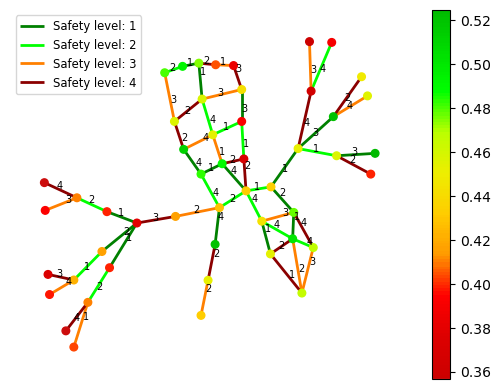

In [77]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import ListedColormap

def plot_centrality(G, G2):
    # Compute the closeness centrality of each node in G taking into account the weights of the edges
    closeness_G = nx.closeness_centrality(G, distance='weight')

    # Compute the closeness centrality of each node in G2 taking into account the weights of the edges
    closeness_G2 = nx.closeness_centrality(G2, distance='weight')

    # Compute the ratio of the closeness centrality of each node in G to the closeness centrality of the same node in G2
    s1 = 0
    s2 = 0
    ratio = []
    for node in G.nodes():
        r1 = closeness_G[node]
        r2 = closeness_G2[node]
        s1 = s1 + r1
        s2 = s2 + r2
        ratio.append(r1/r2)

    # Create a color map for the nodes based on the ratio values
    hsv_modified = cm.get_cmap('nipy_spectral_r', 256)
    color_map = ListedColormap(hsv_modified(np.linspace(0.05, 0.50, 256)))
    # plt.figure(figsize=(10, 5))
    # Draw the graph with the nodes colored according to the ratio values
    #pos = nx.spring_layout(G)
    # nx.draw_networkx_nodes(G, pos, node_size=70, node_color=color_map)
    # nx.draw_networkx_nodes(
    #     G,
    #     pos,
    #     nodelist=G.nodes(),
    #     node_size=80,
    #     node_color=ratio,
    #     # cmap=plt.cm.Blues,
    #     # cmap=plt.cm.Reds_r,
    #     cmap=color_map,
    # )
    # nx.draw_networkx_edges(G, pos)
    # plt.colorbar(cm.ScalarMappable(norm=None, cmap=color_map))
    edges_by_key = {key: [] for key in range(1, 5)}

    # Iterate through each edge in the graph and add it to the dictionary by key
    for endpoint1, endpoint2, data in G.edges(data=True):
        key = data['key']
        edges_by_key[key].append((endpoint1, endpoint2, data))
    for key, edges in edges_by_key.items():
        color = colors[key]
        # weight = sum(data['weight'] for _, _, data in edges)
        # label = f'Key: {key} (Total Weight: {weight})'
        label = f'Safety level: {key}'
        nx.draw_networkx_edges(G, pos, edgelist=[(endpoint1, endpoint2) for endpoint1, endpoint2, _ in edges], edge_color=color, width=2, label=label)

    # Add the edge weights as text labels
    for endpoint1, endpoint2, data in G.edges(data=True):
        print(endpoint1, endpoint2, data['weight'], data['key'], int(data['weight']/int(data['key'])))
        x, y = pos[endpoint1]
        dx, dy = pos[endpoint2][0] - x, pos[endpoint2][1] - y
        angle = math.atan2(dy, dx)
        text_pos = (x + 0.5 * dx - 0.1 * math.cos(angle), y + 0.5 * dy - 0.1 * math.sin(angle))
        plt.text(text_pos[0], text_pos[1], int(data['weight']/int(data['key'])), fontsize=7, color='black')

    # Add labels for the colors and the random weight of the edge
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=ratio, node_size=30, cmap=color_map)
    plt.colorbar(nc)
    plt.legend(loc='upper left',fontsize='small')
    plt.axis('off')
    plt.savefig('./Images/ae_closeness_centrality.png', dpi=800)
    print(round(s1/s2,3))
    plt.show()
plot_centrality(G, G2)

In [81]:
import networkx as nx

def compute_average_difference(G, G1):
    # Initialize the total difference and the total number of reachable nodes
    total_difference = 0
    total_reachable_nodes = 0

    # Iterate over all nodes in G
    for u in G.nodes():
        # Find the shortest paths from u to all reachable nodes in G
        shortest_paths = nx.shortest_path(G, source=u, weight='weight')

        # Iterate over all reachable nodes in G
        for v in shortest_paths:
            if v != u:
                # Compute the absolute difference between the weights of the shortest path in G and G1
                path_G = shortest_paths[v]
                path_G1 = nx.shortest_path(G1, source=u, target=v, weight='weight')
                difference = sum([abs(1/G[path_G[i]][path_G[i+1]]['weight'] - 1/G1[path_G1[i]][path_G1[i+1]]['weight']) for i in range(min(len(path_G)-1,len(path_G1)-1))])

                # Update the total difference and total number of reachable nodes
                total_difference += difference
                total_reachable_nodes += 1

    # Compute the average difference between the weights of the shortest paths in G and G1
    if total_reachable_nodes > 0:
        average_difference = total_difference / total_reachable_nodes
    else:
        average_difference = 0

    return average_difference
print(compute_average_difference(G, G2))

1.4787641723356093
